12-1: The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in nonlinear relationships. Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. YOu will have to write a version of RunLinearModel that runs that quadratic model, but after that you should be able to reuse code in timeseries.py to generate predictions. 

In [8]:
import pandas
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as smtsa
import regression
import timeseries
import matplotlib.pyplot as pyplot
import thinkplot
import thinkstats2

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64
4445
0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64
7.265628457623368
3.302558389828803
   caseid  rscrinf  rdormres  rostscrn  rscreenhisp  rscreenrace  age_a  \
0    2298        1         5         5            1          5.0     27   
1    5012        1         5         1            5          5.0     42

In [14]:
def RunQuadraticModel(daily):
    daily["years2"] = daily.years**2
    model = smf.ols('ppg ~ years + years2', data=daily)
    results = model.fit()
    return model, results

(<statsmodels.regression.linear_model.OLS at 0x1c2c5df31f0>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1c2c536aa60>)

In [22]:
transactions = timeseries.ReadData()
dailies = timeseries.GroupByQualityAndDay(transactions)
name = "high"
daily = dailies[name]

model, results = RunQuadraticModel(daily)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):          4.57e-164
Time:                        15:28:58   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
years2         0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
regression.SummarizeResults(results)

Intercept   13.7   (0)
years   -1.12   (5.86e-38)
years2   0.113   (4.82e-07)
R^2 0.4553
Std(ys) 1.096
Std(res) 0.809


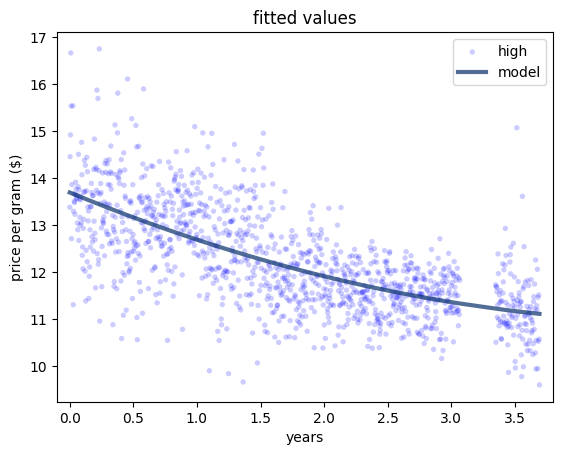

In [17]:
timeseries.PlotFittedValues(model, results, label=name)
thinkplot.Config(root='timeseries11', title='fitted values', xlabel='years', xlim=[-0.1, 3.8], ylabel='price per gram ($)')

C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\thinkstats2.py:161: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\thinkstats2.py:161: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\thinkstats2.py:161: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())
C:\Users\brean\OneDrive\Desktop\NucampFolder\projects\ThinkStats2\code\thinkstats2.py:161: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())
C:\Users\brean\OneDrive\Desktop\NucampFolder

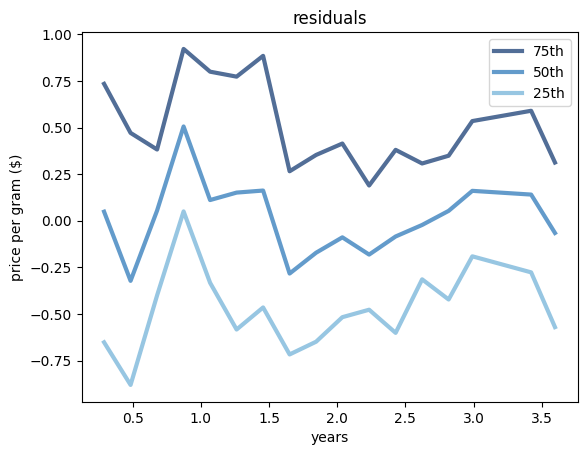

In [19]:
timeseries.PlotResidualPercentiles(model, results)
thinkplot.Config(root='timeseries12', title='residuals', xlabel='years', ylabel='price per gram ($)')

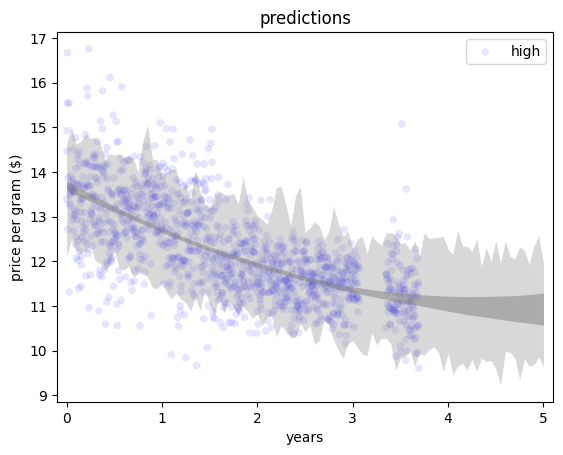

In [20]:
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
timeseries.PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(root='timeseries13', title='predictions', xlabel='years', xlim=[years[0]-0.1, years[-1]+0.1], 
                 ylabel='price per gram ($)')

12-2: Write a definition for a class named SerialCorrelationTest that extends HypothesisTest from HypothesisTest. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation. Use this class to test whether the serial correlation in raw price data is statistcally significant. Also test the residuals of the linear model and (if you did the previous exercise), the qudratic model. 

In [ ]:
# Solution


class SerialCorrelationTest(thinkstats2.HypothesisTest):


    def TestStatistic(self, data):

        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):

        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag
    
    
# Solution

# test the correlation between consecutive prices

name = "high"
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

# Solution

# test for serial correlation in residuals of the linear model

_, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

# Solution

# test for serial correlation in residuals of the quadratic model

_, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)